##### In this chapter we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of machine learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns machine learning tackles this dataset sooner or later.


##### Just like in the previous chapter, let's define the default font sizes to make the figures prettier:

In [91]:
import matplotlib.pyplot as plt 
plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.figure(figsize=(15,15))


<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

And let's create the `images/classification` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [92]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [93]:
from sklearn.datasets import fetch_openml

In [94]:
mnist = fetch_openml('mnist_784', as_frame=False)

## Sklearn Datasets

The `sklearn.datasets` package contains mostly three types of functions:

1. **fetch_* functions**: These functions, such as `fetch_openml()`, are used to download real-life datasets.
2. **load_* functions**: These functions are used to load small toy datasets bundled with Scikit-Learn, so they don’t need to be downloaded over the internet.
3. **make_* functions**: These functions generate fake datasets, which are useful for testing purposes.

Generated datasets are usually returned as an `(X, y)` tuple, where:

- `X` contains the input data (features) as a NumPy array.
- `y` contains the target labels as a NumPy array.

Other datasets are returned as `sklearn.utils.Bunch` objects. These are essentially dictionaries whose entries can also be accessed as attributes. They typically contain the following keys:

- **"DESCR"**: A description of the dataset.
- **"data"**: The input data, usually stored as a 2D NumPy array.
- **"target"**: The target labels, usually stored as a 1D NumPy array.


In [95]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
X.shape

(70000, 784)

In [97]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [98]:
y.shape

(70000,)

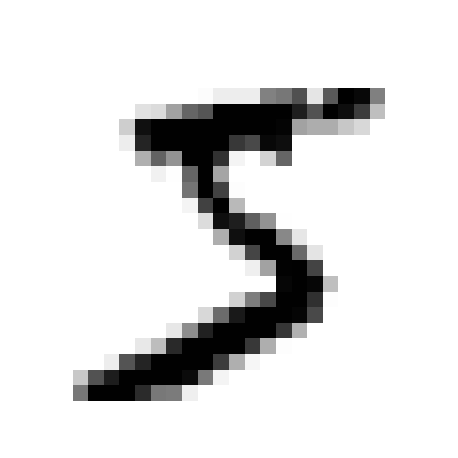

In [99]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  #save the image ----->> Extra Code
plt.show()

In [100]:
y[0]

'5'

In [101]:
X_train,X_test,y_train,y_test = X[:60000],X[:60000],y[:60000],y[:60000]

#### Training Binary Classifier

In [102]:
y_train_5 = (y_train == '5')  #True for all 5s and False for all other digits
y_test_5 = (y_test == '5')
#Extra Code
print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[ True False False ...  True False False]


##### In the above cell, we create a target vectors (new set) in all the `y_train` values were given to `y_train_5` and it will save an array of True for record where value is 5 and False for record where value is non 5 digit (ex: 1, 4, 6,89, etc) and simillarly we do in `y_test_5.

In [103]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

Training a Classifier

We will pick a classifier and train it. A good starting point is the **Stochastic Gradient Descent (SGD)** classifier. Scikit-Learn provides the `SGDClassifier` class for this purpose.

Why SGDClassifier?
- **Efficient for large datasets**: The SGDClassifier can handle very large datasets efficiently.
- **Online learning**: Since SGD processes training instances one at a time (independently), it is well suited for online learning (incrementally learning from data as it arrives).

Steps to create and train the SGDClassifier:

1. Import the `SGDClassifier` from `sklearn.linear_model`.
2. Create an instance of the classifier with a fixed random seed for reproducibility (`random_state=42`).
3. Train the classifier on the whole training set using the `fit()` method.

`from sklearn.linear_model import SGDClassifier`

Create an SGDClassifier instance
- `sgd_clf = SGDClassifier(random_state=42)`

Train the classifier on the training data
- `sgd_clf.fit(X_train, y_train_5)`

- `X_train` contains the training input data.
- `y_train_5` contains the target labels for the training set (whether the digit is 5 or not, in this case).


In [104]:
sgd_clf.predict([some_digit])  #Check the prediction of the model. You can change the value of index which is pass to the some_digit[] 

array([ True])

Measuring Accuracy Using Cross-Validation

In [105]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5, cv=3, scoring ="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Evaluating the Model using Cross-Validation

To evaluate a model, one effective technique is **cross-validation**. We can use the `cross_val_score()` function to perform this. Cross-validation helps us assess how well the model performs on unseen data.

What is Cross-Validation?
- **K-fold Cross-Validation**: This method involves splitting the training set into `k` equal parts (folds). The model is trained `k` times, and each time a different fold is kept aside for evaluation, while the remaining `k-1` folds are used for training.
- In this example, we use **3-fold cross-validation**, which means the training set is divided into 3 parts, and the model is trained 3 times, each time with a different part held out for evaluation.

Evaluating the SGDClassifier with 3-fold Cross-Validation
- `from sklearn.model_selection import cross_val_score`

Perform 3-fold cross-validation
- `cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")`

Here:
- `cv=3`: This specifies that we are using 3-fold cross-validation.
- `scoring="accuracy"`: This tells the function to use accuracy as the evaluation metric.


In [106]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [107]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


Dummy Classifier

Sometimes, we want to compare our model with a very simple "dummy" model to see if it's actually performing better than random guessing or a very basic strategy.

What is a Dummy Classifier?

The **DummyClassifier** is a classifier in Scikit-Learn that follows a simple strategy to make predictions. It doesn't try to "learn" from the data, but instead uses a predefined rule, such as:
- **Most Frequent**: Always predicting the most frequent class in the training data.
- **Uniform**: Randomly predicting a class based on the distribution of classes.
- **Constant**: Always predicting a constant label.

Example: Predicting the Most Frequent Class (Non-5)

In this case, we are using a dummy classifier that predicts every image as the **most frequent class**. Since there are fewer images of the digit 5, the most frequent class is "not 5". 

Code to Use Dummy Classifier:

```python
from sklearn.dummy import DummyClassifier

# Create a DummyClassifier instance
dummy_clf = DummyClassifier()

# Train the classifier (it just memorizes the most frequent class)
dummy_clf.fit(X_train, y_train_5)

# Predict on the training set (will always predict 'not 5')
print(any(dummy_clf.predict(X_train)))  # Prints False: no 5s detected

More About Dummy Classifier:

- Purpose: The DummyClassifier is useful for establishing a baseline. It helps us understand whether our actual model is performing better than a simple, non-learned model.
- Strategies: There are various strategies you can use with the DummyClassifier:
    - "most_frequent": Always predict the most frequent class.
    - "stratified": Generate random predictions based on the training       set's class distribution.
    - "uniform": Predict classes uniformly at random.
    - "constant": Always predict a constant label you provide.


In [108]:
cross_val_score(dummy_clf,X_train,y_train_5,cv = 3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

This tells us why accuracy is not preffered performance messure for classifiers, especially if datasets are skewed.

A better way is to use confusion matrix (CM) to evaluate the performance of a classifier

### Confusion Matrices


### Evaluating Classification Models: Precision, Recall, and F1-Score. We will consider "Spam Filtering Model" as example to understand.

#### Introduction
When training a classification model, such as a spam filter, you need reliable ways to measure performance. Should the model prioritize identifying all spam emails (high recall), or should it avoid marking legitimate emails as spam (high precision)? Metrics like the confusion matrix, precision, recall, and F1-score can help evaluate the model’s effectiveness.



#### Confusion Matrix
A confusion matrix is a table used to assess the performance of a classification model. It compares the actual classes of instances with the classes predicted by the model. The matrix typically consists of four key components:

- **True Positives (TP)**: Correctly classified as positive.
- **True Negatives (TN)**: Correctly classified as negative.
- **False Positives (FP)**: Incorrectly classified as positive (Type I error).
- **False Negatives (FN)**: Incorrectly classified as negative (Type II error).

|                | Predicted: 0 | Predicted: 1 |
|----------------|--------------|--------------|
| **Actual: 0**  | TN           | FP           |
| **Actual: 1**  | FN           | TP           |

#### Accuracy
Accuracy measures the proportion of correct predictions (both positive and negative) among all predictions. The formula for accuracy is:


Accuracy = {TP + TN}/{TP + TN + FP + FN}


Accuracy is a helpful metric, but it can be misleading in cases of class imbalance. For example, if only 1% of emails are spam, a model predicting "not spam" for every email would achieve 99% accuracy, while missing the actual spam. In such cases, you’ll want to consider additional metrics like precision, recall, and F1-score for a more complete picture of your model’s performance.

#### Precision
Precision measures the proportion of true positive predictions among all positive predictions. It helps answer the question: "Out of all instances classified as positive, how many were actually positive?"


Precision = {TP}/{TP + FP}


- **High precision**: Few false positives, meaning the model rarely flags legitimate emails as spam.
- **Low precision**: Many false positives, meaning the model often flags legitimate emails as spam.

#### Recall
Recall measures the proportion of true positives among all actual positive instances. It answers the question: "Out of all actual positive instances, how many were correctly identified?"

Recall = {TP}/{TP + FN}


- **High recall**: The model successfully identifies most of the positive cases (e.g., spam emails).
- **Low recall**: The model misses many positive cases, allowing some spam to slip through.

#### F1-Score
Precision and recall often have an inverse relationship. So, which one matters more? It depends! In healthcare, where misdiagnoses are critical, high recall might be paramount. In finance, where false positives can trigger unnecessary transactions, high precision might be crucial. Consider the real-world implications of your model’s predictions to weigh the importance of each metric. Focusing on improving one might lead to the reduction of the other. The F1-score provides a balance between precision and recall and is calculated as the harmonic mean of the two:


{F1} = 2 * {Precision * Recall} / {Precision + Recall}


- **Ranges from 0 to 1**, with 1 being the ideal score.
- **Combines the strengths of precision and recall**, making it a useful metric when a balance is needed.



#### Computing the Confusion Matrix with `cross_val_predict()`

To evaluate a model's performance using a confusion matrix, we need a set of predictions to compare with the actual target labels. Although we could use the test set for this, it’s best to keep it untouched until the final evaluation. Instead, we can use the `cross_val_predict()` function from Scikit-Learn, which performs K-fold cross-validation and returns predictions for each fold.

Below is an example of using `cross_val_predict()` to compute a confusion matrix on the MNIST dataset:


In [109]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [110]:
print(type(y_train_5[3]))
print(type(y_train_pred[3]))

<class 'numpy.bool_'>
<class 'numpy.str_'>


#### Understanding `cross_val_predict()` and Code Explanation

The `cross_val_predict()` function performs k-fold cross-validation but returns predictions for each test fold rather than evaluation scores. This provides "clean" predictions for each instance in the training set, meaning that the model makes predictions on data it has not seen during training.

`cross_val_predict()`:
- Performs k-fold cross-validation (in this case, 3 folds as specified by cv=3).
- It splits the training data (X_train and y_train_5) into three subsets.
- For each fold, the model (sgd_clf) is trained on two subsets and makes predictions on the third (unseen) subset.
- This process is repeated for all three folds, providing out-of-sample predictions for every instance.

`(y_train_pred)`:
- The predictions for each data point in the training set, ensuring that the model's predictions are unbiased (out-of-sample).

In [111]:
## Extra code to change the type of y_train_pred from string to boolean
y_train_pred = y_train_pred.astype(bool)   

print(type(y_train_5[3]))
print(type(y_train_pred[3]))

<class 'numpy.bool_'>
<class 'numpy.bool_'>


In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_train_5,y_train_pred)
cm


array([[ 5915, 48664],
       [   68,  5353]], dtype=int64)

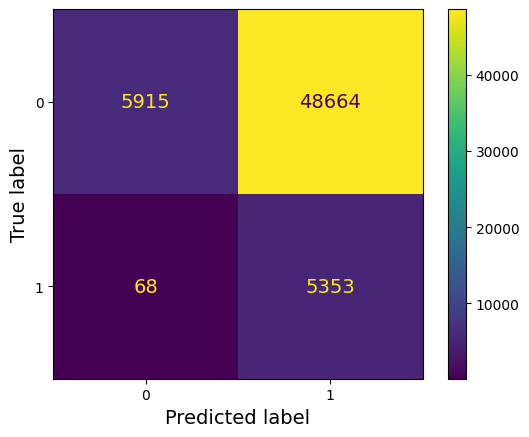

In [113]:

#Extra Code 
cmd = ConfusionMatrixDisplay(cm)  # To display the matrix in HeatMap form
cmd.plot()

 A perfect classifier would only have true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right): Ex

In [114]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5,y_train_pred)

0.09909843197511894

In [117]:
recall_score(y_train_5,y_train_pred)

0.9874561888950378

In [119]:
f1_score(y_train_5,y_train_pred)

0.1801204616575255